<font color=RED>GABARITO</font>

___
# Aula 03 - Histograma
___


**Preparo Prévio:**
1. Magalhães e Lima, Capítulo 1




**Atenção:** Esta aula retoma o roteiro da aula 2, detendo-se com mais detalhes em alguns aspectos

___

##  Renda per capita e CO2 de países


Relembrando a aula passada, foram coletados dois dados do site https://www.gapminder.org/:
1. Emissão de CO2 per capita
1. Renda per capita (sendo usado PIB como uma `proxy` de renda)

Em seguida filtramos o ano de 2010 e juntamos os arquivos usando a função join. Ao final salvamos o arquivo em um novo no formato CSV (comma separated values).

Nessa aula vamos continuar trabalhando em cima das variáveis. Em especial vamos trabalhar em cima das variáveis **quantitativas**.

___

## Leitura do arquivo já lapidado

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#Leitura dos arquivos em CSV da aula anterior
data = pd.read_csv('co2_income.csv')
data.head()

,Unnamed: 0,2010_co2,2010_income,region,landlocked
0,Albania,1.336544,9374.0,europe_east,0
1,Algeria,3.480977,12494.0,africa_north,0
2,Angola,1.593918,7047.0,africa_sub_saharan,0
3,Antigua and Barbuda,5.786646,20567.0,america_north,0
4,Argentina,4.466338,15765.0,america_south,0


In [3]:
data.columns

Index(['Unnamed: 0', '2010_co2', '2010_income', 'region', 'landlocked'], dtype='object')

Retomando o que foi feito na aula passada, vamos dar uma olhada em CO2

In [4]:
data["2010_income"].describe()

count       168.000000
mean      16898.964286
std       19264.053119
min         632.000000
25%        3327.500000
50%       10393.000000
75%       21675.500000
max      127984.000000
Name: 2010_income, dtype: float64

Note que algumas medidas resumo descritivas estão disponíveis no `describe()`. Podemos afirmar que a média de CO2 é cerca de 4.87 toneladas por pessoa no ano. Temos também a mediana (também chamada de segundo quartil), primeiro quartil, terceiro quartil, desvio padrão entre outros.

E se quiséssemos capturar alguma medida em uma variável? 

Vamos montar um dicionário:

In [5]:
describe = {'count': len(data["2010_income"]), 
            'mean': data["2010_income"].mean(),
            'std': data["2010_income"].std(),
            'median': data["2010_income"].quantile(0.5)}
describe

{'count': 168,
 'mean': 16898.964285714286,
 'median': 10393.0,
 'std': 19264.053119360506}

Vamos dar uma olhada também no histograma:

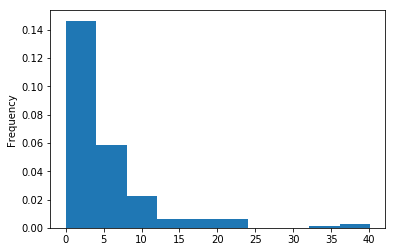

In [6]:
data["2010_co2"].plot(kind='hist', density=True);

 Olhando o gráfico acima, você consegue apontar a média e mediana?

#### Atividade 3

 Use um recurso apropriado para visualizar a coluna `2010_income``
. Justifique

Os recursos apropriados para visualizar uma variável quantitativa são boxplot e histograma. Usaremos ambos

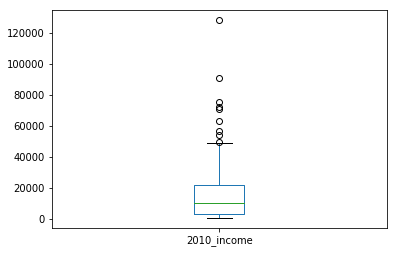

In [7]:
data["2010_income"].plot.box()

No exemplo de boxplot acima podemos ver que a maior parte dos valores está espremida na parte de baixo porque uns poucos valores altos esticaram a escala. Podemos melhorar esta visualização se trabalharmos com escala log na vertical:

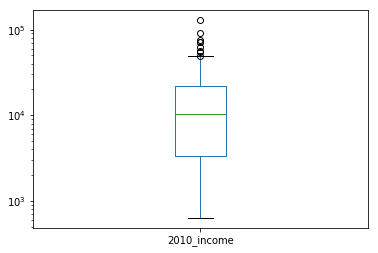

In [8]:
data["2010_income"].plot.box(logy=True)

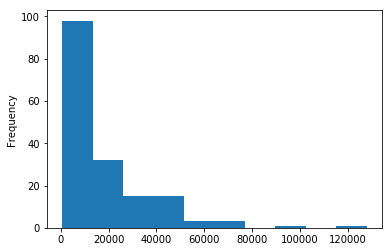

In [9]:
data["2010_income"].plot.hist()

#### Atividade 4 - 2010_income

Particione a coluna *2010_income* em 10 seções. Guarde a coluna de volta no DataFrame como `2010_income_ordinal`

Dica: use `pd.cut()`

In [10]:
data["2010_income_ordinal"] = pd.cut(data["2010_income"], bins=10)

In [11]:
data["2010_income_ordinal"].head()

0    (504.648, 13367.2]
1    (504.648, 13367.2]
2    (504.648, 13367.2]
3    (13367.2, 26102.4]
4    (13367.2, 26102.4]
Name: 2010_income_ordinal, dtype: category
Categories (10, interval[float64]): [(504.648, 13367.2] < (13367.2, 26102.4] < (26102.4, 38837.6] < (38837.6, 51572.8] ... (77043.2, 89778.4] < (89778.4, 102513.6] < (102513.6, 115248.8] < (115248.8, 127984.0]]

#### Atividade 4.1

 Apresente a tabela de frequência da *2010_income_ordinal*

In [12]:
data["2010_income_ordinal"].value_counts()

(504.648, 13367.2]      98
(13367.2, 26102.4]      32
(38837.6, 51572.8]      15
(26102.4, 38837.6]      15
(64308.0, 77043.2]       3
(51572.8, 64308.0]       3
(115248.8, 127984.0]     1
(89778.4, 102513.6]      1
(102513.6, 115248.8]     0
(77043.2, 89778.4]       0
Name: 2010_income_ordinal, dtype: int64

#### Atividade 5


#### 5.1 Análise com variáveis quantitativas
Você foi encarregado de responder se a  seguinte afirmação é verdadeira ou falsa: a taxa de fertilidade é maior em regiões menos desenvolvidas do mundo.


Responda visualizando `2010_income`  versus taxa de fertilidade. Lembre-se do diagrama de dispersão visto na aula passada.

A taxa de fertilidade [pode ser encontrada no site do Gapminder](https://www.gapminder.org/data/documentation/gd008/).




In [13]:
fert = pd.read_excel("children_per_woman_total_fertility.xlsx")

In [14]:
fert.head(3)

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Estamos interessados apenas no valor de 2010, para que a análise fique coerente com os dados da coluna `data['2010_income']` . Vamos portanto selecionar este sub-dataframe

In [15]:
fert_10 = fert.loc[:, ["geo", 2010]]

In [16]:
fert_10.head(2)

,geo,2010
0,Abkhazia,NaN
1,Afghanistan,5.82


Precisamos converter o índice para que seja o mesmo no join.

In [17]:
fert_idx = fert_10.set_index("geo")

In [18]:
data.head()

,Unnamed: 0,2010_co2,2010_income,region,landlocked,2010_income_ordinal
0,Albania,1.336544,9374.0,europe_east,0,"(504.648, 13367.2]"
1,Algeria,3.480977,12494.0,africa_north,0,"(504.648, 13367.2]"
2,Angola,1.593918,7047.0,africa_sub_saharan,0,"(504.648, 13367.2]"
3,Antigua and Barbuda,5.786646,20567.0,america_north,0,"(13367.2, 26102.4]"
4,Argentina,4.466338,15765.0,america_south,0,"(13367.2, 26102.4]"


In [19]:
data.rename(columns={data.columns[0]:'country'}, inplace=True)

Vamos definir o nome do país como índice. 

In [20]:
data.set_index('country', inplace=True) # O inplace troca no próprio DataFrame

In [21]:
data_fert = data.join(fert_idx, how="inner", rsuffix="fert")

In [22]:
data_fert.head(3)

,2010_co2,2010_income,region,landlocked,2010_income_ordinal,2010
Albania,1.336544,9374.0,europe_east,0,"(504.648, 13367.2]",1.65
Algeria,3.480977,12494.0,africa_north,0,"(504.648, 13367.2]",2.89
Angola,1.593918,7047.0,africa_sub_saharan,0,"(504.648, 13367.2]",6.16


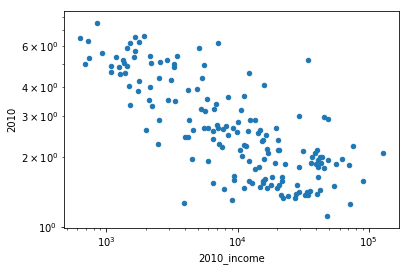

In [23]:
data_fert.plot.scatter(x="2010_income", y = 2010, loglog=True)

#### 5.2 Análise com variáveis qualitativas

Adote um outro enfoque: cruze a taxa de fertilidade com o atributo de regiões


**Responda:**

Para visualizar melhor é mais útil ver a versão absoluta ou relativa da tabela cruzada? Ou seja, é mais útil que a tabela toda some 100%, ou somar 100% por região? *como se faz isso?*


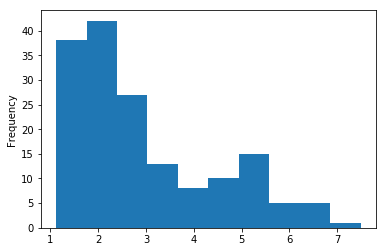

In [24]:
data_fert[2010].plot.hist()

In [25]:
data_fert["Fertilidade cut"] = pd.cut(data_fert[2010],bins=4)

In [26]:
ct = pd.crosstab(data_fert["Fertilidade cut"], data_fert["region"])

In [27]:
ct

region,africa_north,africa_sub_saharan,america_north,america_south,asia_west,east_asia_pacific,europe_east,europe_west
Fertilidade cut,,,,,,,,
"(1.114, 2.713]",2,4,12,10,13,13,23,20
"(2.713, 4.305]",2,7,4,2,8,8,0,0
"(5.898, 7.49]",0,26,0,0,1,1,0,0
"(4.305, 5.898]",0,7,0,0,0,1,0,0


#### Atividade 6 - análise livre

Vá ao site [gapminder.org](https://www.gapminder.org/data/) e escolha uma variável quantitativa.


Visualize esta variável usando histograma *e* boxplot.

Classifique o comportamento desta variável em relação a assimetrias e apresente as principais medidas-resumo: média, mediana e desvio padrão

Explique o que significam as partes do boxplot


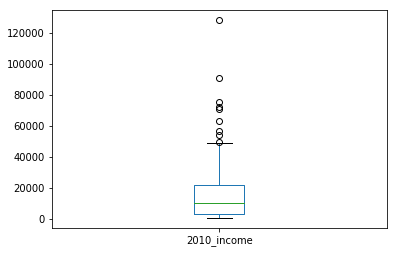

In [28]:
data.loc[:, "2010_income"].plot.box()

#### Atividade 7 - cruzamento de dados

A variável estudada na atividade anterior tem seu valor influenciado pela região ou pelo GDP per capita? Estude ambas as hipóteses

Vamos escolher as [Exportações como percentual do GDP](https://docs.google.com/spreadsheets/d/1Cw9r5Pzz8AmN4qYptNOIf6FMoWndPKf3MAJAnKukCoQ/pub).





In [29]:
exports = pd.read_excel("Exports (p of GDP).xlsx")

In [30]:
exports.head(2)

,Exports of goods and services (% of GDP),1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,4.453443,4.878051,9.171601,8.888893,11.258279,8.571429,6.772908,8.899677,10.094637,...,32.438501,42.2955,32.93117,30.550988,27.640178,22.926131,26.67612,22.860093,20.124519,18.106142


In [31]:
exports = exports.set_index("Exports of goods and services (% of GDP)")

In [32]:
# Vamos renomear todas as colunas da tabela exports para evitar colisão de nomes
exports = exports.rename(index=str, columns=lambda column: "exports_" + column)

In [33]:
data_exp = data.join(exports, how="inner")

In [34]:
data_exp.head(3)

,2010_co2,2010_income,region,landlocked,2010_income_ordinal,exports_1961,exports_1962,exports_1963,exports_1964,exports_1965,...,exports_2002,exports_2003,exports_2004,exports_2005,exports_2006,exports_2007,exports_2008,exports_2009,exports_2010,exports_2011
Albania,1.336544,9374.0,europe_east,0,"(504.648, 13367.2]",NaN,NaN,NaN,NaN,NaN,...,20.419307,20.619399,21.542118,22.273069,25.090526,28.777169,29.511318,28.411549,32.427471,33.800932
Algeria,3.480977,12494.0,africa_north,0,"(504.648, 13367.2]",46.244557,19.793872,24.684682,25.084059,22.603944,...,35.076150,38.266470,40.071885,47.646353,48.607848,46.609494,46.273658,29.289305,30.830405,NaN
Angola,1.593918,7047.0,africa_sub_saharan,0,"(504.648, 13367.2]",NaN,NaN,NaN,NaN,NaN,...,74.953839,69.569978,69.686683,86.017538,79.837278,76.397484,78.098523,55.055275,62.413106,64.976975


Temos 2 caminhos:

1. Aplicar `pd.cut` para comparar os valores que estão na coluna `exports_2010_income` com os valores de `data["2010_income_ordinal"]`, que já estão separados por faixas. Desta forma compararemos duas qualitativas ordinais
2. Comparar as variáveis quantitativas `exports_2010`e `2010_income` diretamente

** Caminho 1 - usando pd.cut**


Vamos plotar um histograma da variável `exports_2010` para estudar seu comportamento. Pergunta de cultura geral: É normal que em alguns países as exportações sejam maiores que 100% ou mesmo 200% do GDP?

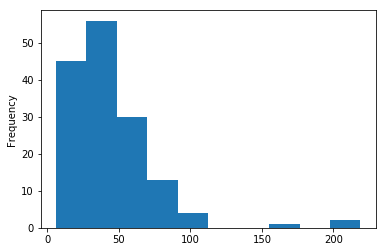

In [35]:
data_exp["exports_2010"].plot.hist()

A coluna `exports_2010` tem vários valores nulos que posterioremente vão causar problemas. Podemos verificar isto usando o método `isnull()` seguido de `any()` abaixo:

In [36]:
data_exp["exports_2010"].isnull().any()

True

A filtragem abaixo cria o *dataframe*  `data_exp_notnull`, ou `denn`, que contém só os valores não nulos

In [37]:
data_exp_notnull = data_exp[~data_exp["exports_2010"].isnull()]

In [38]:
denn= data_exp_notnull # guardando numa variável menor Data Exp Not Null: denn

Vamos segmentar  a coluna de exportações em 8 faixas

In [39]:
exports_2010_ordinal = pd.cut(denn["exports_2010"], bins=8)

Finalmente tracamos o *crosstab*, ou tabela cruzada, contando as ocorrências conjuntas de renda e porcentual de GDP em exportações 

In [40]:
exports_vs_income_ordinal_ct = pd.crosstab(index=denn["2010_income_ordinal"], columns = exports_2010_ordinal)

In [41]:
exports_vs_income_ordinal_ct

exports_2010,"(5.922, 32.726]","(32.726, 59.316]","(59.316, 85.907]","(85.907, 112.498]","(165.68, 192.271]","(192.271, 218.862]"
2010_income_ordinal,,,,,,
"(504.648, 13367.2]",42,7,35,0,0,2
"(13367.2, 26102.4]",10,5,13,0,0,2
"(38837.6, 51572.8]",8,2,4,0,0,1
"(64308.0, 77043.2]",3,2,6,0,1,1
"(26102.4, 38837.6]",0,1,2,0,0,0
"(89778.4, 102513.6]",0,2,0,0,1,0
"(51572.8, 64308.0]",0,0,0,1,0,0


se quisermos ver os valores relativos, precisaremos dividir cada ocorrência cruzada pelo total

In [42]:
total = exports_vs_income_ordinal_ct.sum().sum()

Dividindo teremos os valores fracionários das ocorrências

In [43]:
exports_vs_income_ordinal_ct/total

exports_2010,"(5.922, 32.726]","(32.726, 59.316]","(59.316, 85.907]","(85.907, 112.498]","(165.68, 192.271]","(192.271, 218.862]"
2010_income_ordinal,,,,,,
"(504.648, 13367.2]",0.278146,0.046358,0.231788,0.000000,0.000000,0.013245
"(13367.2, 26102.4]",0.066225,0.033113,0.086093,0.000000,0.000000,0.013245
"(38837.6, 51572.8]",0.052980,0.013245,0.026490,0.000000,0.000000,0.006623
"(64308.0, 77043.2]",0.019868,0.013245,0.039735,0.000000,0.006623,0.006623
"(26102.4, 38837.6]",0.000000,0.006623,0.013245,0.000000,0.000000,0.000000
"(89778.4, 102513.6]",0.000000,0.013245,0.000000,0.000000,0.006623,0.000000
"(51572.8, 64308.0]",0.000000,0.000000,0.000000,0.006623,0.000000,0.000000


Podemos também multiplicar por $100$ para que os valores estejam em percentuais

In [44]:
percent = exports_vs_income_ordinal_ct/total*100


In [45]:
percent.head(3)

exports_2010,"(5.922, 32.726]","(32.726, 59.316]","(59.316, 85.907]","(85.907, 112.498]","(165.68, 192.271]","(192.271, 218.862]"
2010_income_ordinal,,,,,,
"(504.648, 13367.2]",27.814570,4.635762,23.178808,0.0,0.0,1.324503
"(13367.2, 26102.4]",6.622517,3.311258,8.609272,0.0,0.0,1.324503
"(38837.6, 51572.8]",5.298013,1.324503,2.649007,0.0,0.0,0.662252


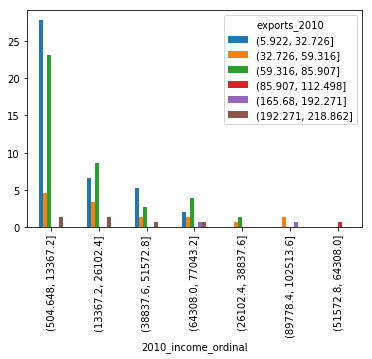

In [46]:
percent.plot.bar()

Podemos transpor o dataframe para permutar os agrupamentos. Note o uso do operador "T"

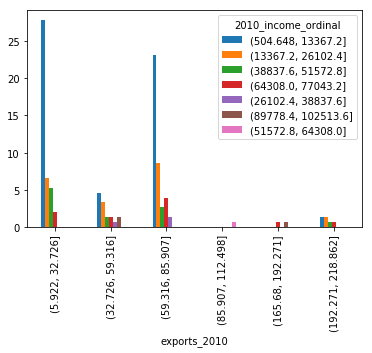

In [47]:
percent.T.plot.bar()

**Caminho 2 - usando scatterplot **

Para esta abordagem não é necessário converter nenhuma das variáveis em qualitativa ordinal:

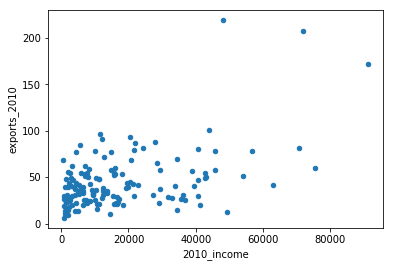

In [48]:
data_exp.plot.scatter(x="2010_income", y="exports_2010")

Podemos converter as escalas para logaritmicas:

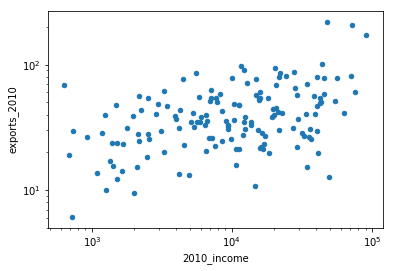

In [49]:
data_exp.plot.scatter(x="2010_income", y="exports_2010", loglog=True)

Os dados acima parecem indicar que há um aumento do percentual das exportações no GDP de um país à medida que o GDP per capita aumenta. Podemos verificar a **correlação** entre as variáveis

In [50]:
data_exp["2010_income"].corr(data_exp.exports_2010)


0.5025662576642945

O que estes valores indicam? Aguarde a aula 4